In [1]:
from datetime import datetime

In [2]:
datetime(year=2020, month=12, day=3)

datetime.datetime(2020, 12, 3, 0, 0)

In [3]:
from dateutil import parser

In [5]:
date = parser.parse('4th of october,20')
date


datetime.datetime(2020, 10, 4, 0, 0)

In [6]:
date.strftime('%A')

'Sunday'

In [7]:
# datetime64 datatype in numpy, allows array of date and time to be represented very compactly

In [8]:
import numpy as np

In [9]:
date = np.array('2020-10-11',dtype=np.datetime64)

In [10]:
date

array('2020-10-11', dtype='datetime64[D]')

In [11]:
# we can do vectorization operations on it

In [13]:
date+np.arange(12)
# increase the day by 12 stepping 1 step at a time

array(['2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14',
       '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
       '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22'],
      dtype='datetime64[D]')

In [19]:
np.datetime64('2020-10-12 12:34') # specifying the timezone, minute-based datetime


numpy.datetime64('2020-10-12T12:34')

In [21]:
# nanosecond based datetime
np.datetime64('2020-11-19 12:45:34.20','ns')

numpy.datetime64('2020-11-19T12:45:34.200000000')

In [22]:
# for types of data we see in real life, a useful default is datetime64[ns] as it can encode useful range of modern date
# with suitably fine precision

In [23]:
import pandas as pd

In [25]:
# pandas provide efficeint storage and vectorized implementation 
# gives Timestamp object

In [29]:
date= pd.to_datetime('4th of july 20 12:24')
date

Timestamp('2020-07-04 12:24:00')

In [30]:
date.strftime("%A")

'Saturday'

In [31]:
# we can do numpy style vectorized operations directly


In [36]:
date+pd.to_timedelta(np.arange(10),'d') # ease of use

DatetimeIndex(['2020-07-04 12:24:00', '2020-07-05 12:24:00',
               '2020-07-06 12:24:00', '2020-07-07 12:24:00',
               '2020-07-08 12:24:00', '2020-07-09 12:24:00',
               '2020-07-10 12:24:00', '2020-07-11 12:24:00',
               '2020-07-12 12:24:00', '2020-07-13 12:24:00'],
              dtype='datetime64[ns]', freq=None)

### Pandas TimeSeries Indexing by time

In [37]:
index = pd.DatetimeIndex(['2014-07-04','2014-08-04',
                         '2015-07-04','2015-08-04'])
data = pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [38]:
# we can make use of series indexing pattern here

In [39]:
data['2014-07-05':'2015-09-10']

2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [40]:
# date only indexing operations

In [41]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### pandas time series datastructure

In [45]:
# Timestamp ---> DatetimeIndex, Timedelta--->TimedeltaIndex and Period----> Periodindex type

In [50]:
date = pd.to_datetime('5th of oct 2020')
date # passing a single date to to_datetime yields a Timestamp

Timestamp('2020-10-05 00:00:00')

In [53]:
date = pd.to_datetime(['4th of july 20','2020-11-03'])
date # passing a series of date to todatetime yields datetime index

DatetimeIndex(['2020-07-04', '2020-11-03'], dtype='datetime64[ns]', freq=None)

In [55]:
# datetime index can be converted into periodindex with addition of to_period and a frequency code

date.to_period('D') # D represents daily

PeriodIndex(['2020-07-04 00:00', '2020-11-03 00:00'], dtype='period[H]', freq='H')

In [57]:
# timedelta index is creted when one date is subtracted from another

date -date[1]

TimedeltaIndex(['-122 days', '0 days'], dtype='timedelta64[ns]', freq=None)

### Regular Sequences

In [59]:
# for creation of regular date sequences, date_range() period_range() timedelta_range()
# same as python range and numpys arange function
# accepts start date end date and optional frequency code

In [63]:
pd.date_range('2015-08-19','2015-08-30') # default frequency is 1 day

DatetimeIndex(['2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22',
               '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26',
               '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30'],
              dtype='datetime64[ns]', freq='D')

In [65]:
# can also be specified with daterange and number of periods
pd.date_range('2015-9-23',periods=10)

DatetimeIndex(['2015-09-23', '2015-09-24', '2015-09-25', '2015-09-26',
               '2015-09-27', '2015-09-28', '2015-09-29', '2015-09-30',
               '2015-10-01', '2015-10-02'],
              dtype='datetime64[ns]', freq='D')

In [73]:
# we can also construct frequency of hourly timestamp
pd.date_range('2017-09-8',periods=4,freq='H')


DatetimeIndex(['2017-09-08 00:00:00', '2017-09-08 01:00:00',
               '2017-09-08 02:00:00', '2017-09-08 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [74]:
# monthly periods

pd.date_range('2018-07',periods=8,freq='M')

DatetimeIndex(['2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28'],
              dtype='datetime64[ns]', freq='M')

In [75]:
# sequence of duration increased by hour

pd.date_range(0,periods=10,freq='H')

DatetimeIndex(['1970-01-01 00:00:00', '1970-01-01 01:00:00',
               '1970-01-01 02:00:00', '1970-01-01 03:00:00',
               '1970-01-01 04:00:00', '1970-01-01 05:00:00',
               '1970-01-01 06:00:00', '1970-01-01 07:00:00',
               '1970-01-01 08:00:00', '1970-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [76]:
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [77]:
pd.period_range('2018-07-30', periods=10, freq='H')

PeriodIndex(['2018-07-30 00:00', '2018-07-30 01:00', '2018-07-30 02:00',
             '2018-07-30 03:00', '2018-07-30 04:00', '2018-07-30 05:00',
             '2018-07-30 06:00', '2018-07-30 07:00', '2018-07-30 08:00',
             '2018-07-30 09:00'],
            dtype='period[H]', freq='H')

### Frequencies and Offset

In [78]:
pd.timedelta_range(0,periods=10,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [79]:
from pandas.tseries.offsets import BDay

In [80]:
pd.date_range('2018-9-23',periods=10,freq=BDay()) # increases by business day and gives 10 periods

DatetimeIndex(['2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-10-01', '2018-10-02', '2018-10-03',
               '2018-10-04', '2018-10-05'],
              dtype='datetime64[ns]', freq='B')

### Resampling Shifting and Windowing

In [84]:
from pandas_datareader import data

In [85]:
# let's load google closing price history

In [86]:
goog = data.DataReader('GOOG', start=2004, end=2016, data_source='google') 

#'google' as data source has been discontinued.


NotImplementedError: data_source='google' is not implemented

In [91]:
import fix_yahoo_finance as yf

/opt/anaconda3/lib/python3.8/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [105]:
yahoo = data.DataReader(name='AAPL',data_source='yahoo',start=2012, end=2020)
yahoo.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060


In [106]:
yahoo=yahoo['Close'] # for simplicity just use the closing price

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

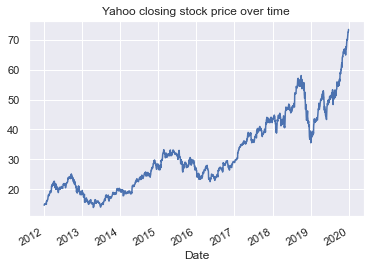

In [108]:
plt.title('Yahoo closing stock price over time')
yahoo.plot()
plt.show()

#### Resampling and converting frequencies

In [109]:
# one important need for timeseries data is resampling at higher or lower frequencies

In [110]:
# we can perform resampling using one of the two methods
# resample() ----> data aggregation method
# asfreq() ----> data selection method 

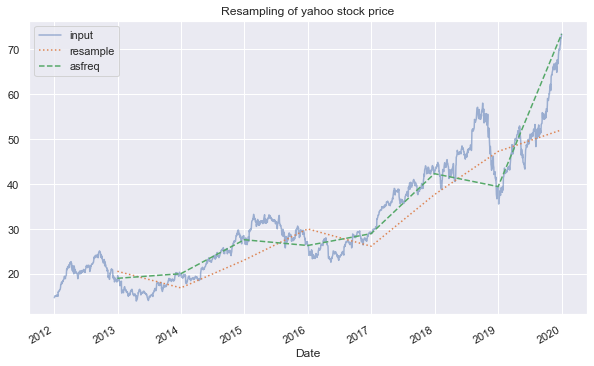

In [116]:
# let's resample the data at the end of business year BA

plt.figure(figsize=(10,6))
plt.title('Resampling of yahoo stock price')
yahoo.plot(alpha=0.5, style='-')
yahoo.resample('BA').mean().plot(style=':')
yahoo.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')
plt.show()

In [117]:
# resample reports the average of the previous year , asfreq reports the value at the end of the year

In [118]:
# for imputed value while doing upsampling, we can either fill using the backward fill or using the forward-fill
# we have the argument called method which can be specified

Text(0.5, 1.0, 'comparision of ffill and bfill interpolation')

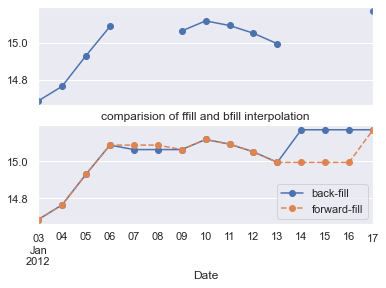

In [130]:
fig,ax = plt.subplots(2, sharex=True)
data = yahoo.iloc[:10]
data.asfreq('D').plot(ax=ax[0],marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D',method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill','forward-fill'])
plt.title('comparision of ffill and bfill interpolation')


#### time-shifts 

In [131]:
# we can either shift the time, or shift the data--- timeshift using tshift method() while datashift using shifts()

In [132]:
# let's shift both time and date by 900 days

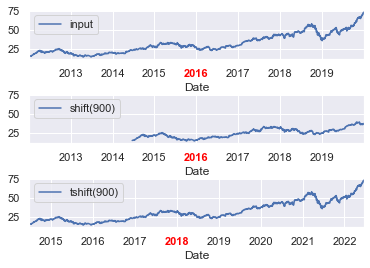

In [156]:
fig, ax = plt.subplots(3,sharey=True)
# apply a frequency to the data

fig.subplots_adjust(hspace=.7)


yahoo = yahoo.asfreq('D',method='pad')
yahoo.plot(ax=ax[0])
yahoo.shift(900).plot(ax=ax[1])
yahoo.tshift(900).plot(ax=ax[2])



# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy',color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy',color='red')
ax[1].axvline(local_max, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy',color='red')
ax[2].axvline(local_max, alpha=0.3, color='red')

In [157]:
# a common context for this type of shifts is computing differece over time
# for example we use shifted values to to compute one year roi for yahoo stock over the course of dataset

Text(0, 0.5, '% retun on investment')

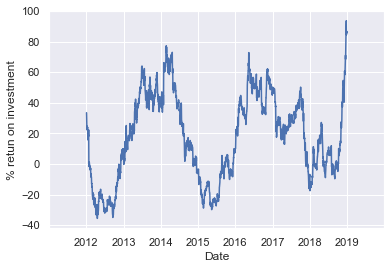

In [158]:
ROI = 100*(yahoo.tshift(-365)/yahoo -1)
ROI.plot()
plt.ylabel('% retun on investment')

In [160]:
# this helps us to see overvall trend of yahoo stock , thus far the most profitable time to invest in yahoo have been
# at the beginning of 2012 it's iPO at the end of 2012, middle of 2105, end of 2018

### Rolling Windows